In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2

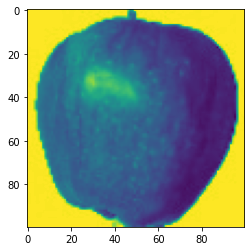

In [54]:
CATEGORIES = ["apples", "oranges"]

for category in CATEGORIES:
    path = os.path.join('./datasets', category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break